In [1]:
from sympy import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
import matplotlib.animation as animation
init_printing(use_latex=True)



/home/enrique/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


# Descripción del modelo

Las luciérnagas proporcionan uno de los ejemplos más espectaculares de
sincronización existentes en la naturaleza. En algunas partes del sud-este de
Asia, miles de machos atestan los árboles durante la noche, encendiendo y
apagando su luz al unísono, esto, con fines de apareamiento. La sincronización tendrá lugar de manera gradual, a medida que la noche avance. Así, cada
luciérnaga aumentará o disminuirá su luz, hasta alcanzar dicha sincronización
con las demás.

Este fenómeno fue estudiado experimentalmente por Hanson en 1978. Así,
mediante el parpadeo periódico de una linterna, Hanson logró sincronizar su
luz con el de una luciérnaga. Para un rango de periódos cercano al periódo
natural de la luciérnaga (aprox. 0,9 s), la luciérnaga fue capaz de igualar la
secuencia del estímulo emitido por Hanson. Sin embargo, si el estímulo era
demasiado rápido, o lento, la luciérnaga no podía seguir dicho estímulo, y se
perdía la sincronización.

Supongase que $\theta(t)$ corresponde a la fase del
destello emitido por la luciérnaga, y $\theta = 0$, al instante en que dicho destello es emitido. En ausencia de estímulo, la luciérnaga atravesará su ciclo a una frecuencia $\omega$, de acuerdo a $\dot{\theta}=\omega$.

Ahora, supongase que existe un estímulo periódico cuya fase satisface $\dot{\theta}=\Omega$, donde $\theta=0$ corresponde al destello del estímulo. Entonces, la respuesta de la
luciérnaga a este estímulo se modela como sigue: Si el estímulo está por delante del ciclo, entonces, se asume que la luciérnaga aumenta su destello en un intento por sincronizar el mismo con las demás. Por el contrario, la luciérnaga disminuirá su destello, si éste es demasiado rápido. Así, un modelo sencillo, que incorpore dichos supuestos, será:

$$\dot{\theta} = \dfrac{d\theta}{dt} = \omega + A\,\sin(\Theta - \theta) ; \quad A>0$$ 

# Análisis del modelo

Para $\phi=\Theta-\theta$, entonces $\dot{\phi}=\dot{\Theta}-\dot{\theta}$

\begin{equation}
\dot{\phi} = \dfrac{d\phi}{dt} = \Omega - \omega -A \, \sin(\phi)
\end{equation}

que corresponde a la ecuación de un oscilador no-uniforme para $\phi(t)$. Adimensionalizando:

$$\phi' = \dfrac{d\phi}{d\tau} = \mu -\sin(\phi) \quad ; \quad \mu = \dfrac{\Omega - \omega}{A} \quad ; \quad \tau = A\,t$$

El grupo adimensional $\mu$, representará entonces una medida de la diferencia de las frecuencias entre el estímulo y la luciérnaga. Cuando $\mu$ resulta pequeña, las frecuencias estarán relativamente cerca, siendo posible la sincronización deseada. 

# ¿Solución analítica del modelo?

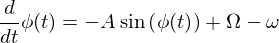

In [2]:
t, Omega, omega, A, phi = symbols("t \\Omega \\omega A \\phi", real = True)
phi = Function("\\phi", real = True)
eq = Omega - omega - A*sin(phi(t))
diffeq = Eq(phi(t).diff(t), eq)
diffeq

In [3]:
sol = dsolve(diffeq, phi(t))

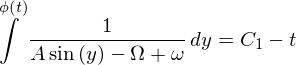

In [4]:
sol

In [5]:
sol.rhs

## ¿Es solución verdaderamente?

In [6]:
simplify(eq.subs(phi(t), sol.rhs) - diff(sol.rhs, t))

A simple vista, resulta complicado determinar una solución analítica para el modelo. 

# Solución de la ecuación diferencial

## Solución para valores arbitrarios (modelo adimensional)

- $\phi=\Theta-\theta$
- $\Theta \quad \rightarrow \quad$ Fase del estímulo
- $\theta \quad \rightarrow \quad$ Fase de la Luciérnaga

$$\phi' = \dfrac{d\phi}{d\tau} = \mu -\sin(\phi) \quad ; \quad \mu = \dfrac{\Omega - \omega}{A} \quad ; \quad \tau = A\,t$$


$$\phi(0)=\pi$$

In [7]:
from scipy.integrate import odeint

def lucy(y, t, Omega, omega, A):
    dydt = [(Omega - omega)/A - np.sin(y[0])]
    return dydt

In [8]:
y0 = [np.pi]

In [9]:
t = np.linspace(0, 10, 100)

In [10]:
Omega = 1
omega = 0
A     = 1

In [11]:
sol1 = odeint(lucy, y0, t, args = (Omega, omega, A))

In [12]:
Omega = 1
omega = 0.8
A     = 1

In [13]:
sol2 = odeint(lucy, y0, t, args = (Omega, omega, A))

/home/enrique/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


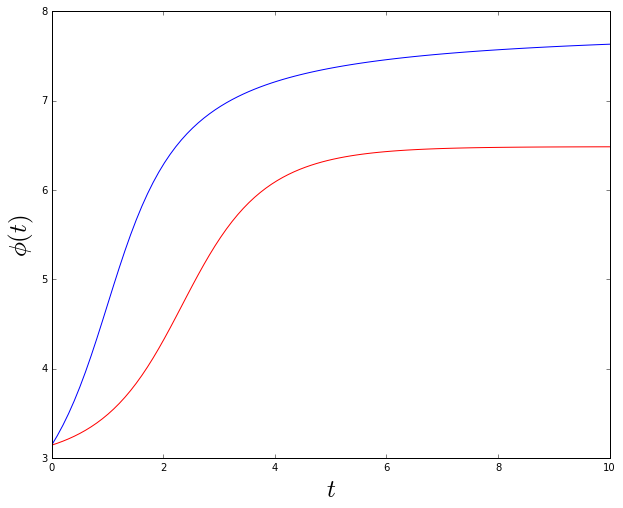

In [14]:
plt.figure(figsize = (10,8))
plt.plot(t, sol1[:, 0], 'b', t, sol2[:,0], 'r')

plt.xlabel('$t$', size = 25)
plt.ylabel('$\\phi(t)$', size = 25)
plt.legend(loc = 'best')
#plt.grid()
plt.show()

#### Para una misma condición inicial, y para frecuencias de fase casi idénticas, la Luciérnaga entrará en sincronización con el estímulo en un periodo de tiempo menor que para frecuencias de fase notablemente disímiles. 

Azul: mayor diferencia en frecuencias (1).

Rojo: menor diferencia en frecuencias (0.2). 

## Para $\mu = 0$ (Punto estable fijo)

Del modelo adimensional, se tiene un punto fijo, o punto estable, para una diferencia de frecuencias nula, y para una condición inicial $\phi(0)=\pi$.

In [15]:
from scipy.integrate import odeint

def lucy(y, t, Om, A):
    dydt = [Om/A - np.sin(y[0])]
    return dydt

In [16]:
y0 = [np.pi]

In [17]:
t = np.linspace(0, 10, 100)

In [18]:
Omega = 1
omega = 1
Om = Omega - omega
A  = 1

In [19]:
sol = odeint(lucy, y0, t, args = (Om, A))

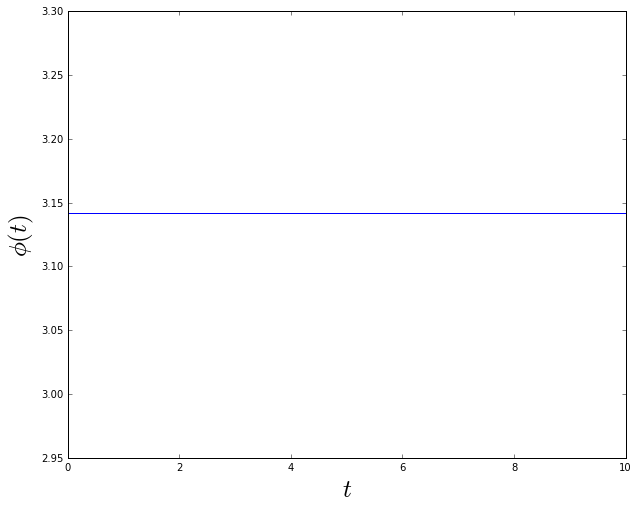

In [20]:
plt.figure(figsize = (10,8))
plt.plot(t, sol[:, 0], 'b')

plt.xlabel('$t$', size = 25)
plt.ylabel('$\\phi(t)$', size = 25)
#plt.grid()
plt.show()

Para esta condición, la luciérnaga entrará en fase de manera inmediata con el estímulo.

# Soluciones para diferentes condiciones iniciales

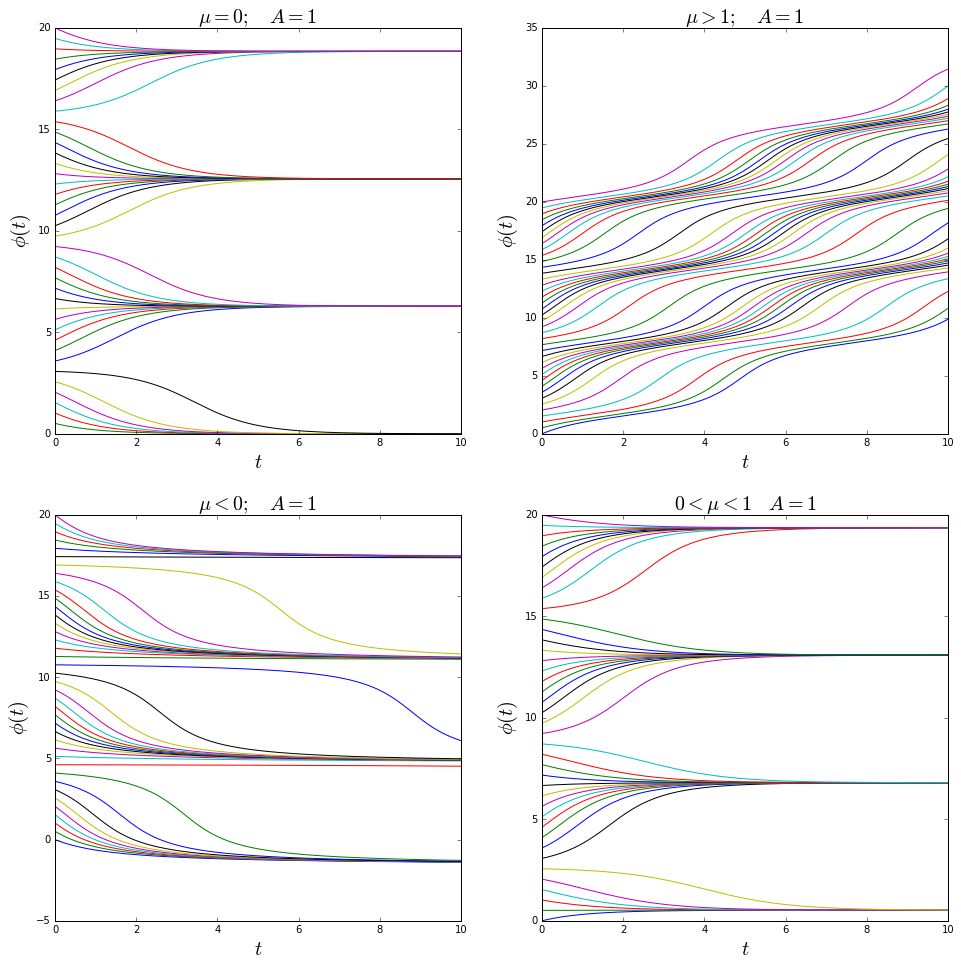

In [21]:
plt.figure(figsize = (16,16))

plt.subplot(2,2,1)

y0    = [np.linspace(0, 20, 40)]
Omega = 1
omega = 1
Om = Omega - omega
A  = 1

for y0 in y0[0]: 
    t = np.linspace(0, 10, 200)
    ps = odeint(lucy, y0, t, args = (Om, A))
    plt.plot(t, ps[:,0])
    plt.xlabel('$t$', size = 20)
    plt.ylabel('$\\phi(t)$', size = 20)
    plt.title('$\\mu = 0; \quad A=1$', size = 20)
    
plt.subplot(2,2,2)

y0    = [np.linspace(0, 20, 40)]
Omega = 2
omega = 0.5
Om = Omega - omega
A  = 1

for y0 in y0[0]: 
    t = np.linspace(0, 10, 200)
    ps = odeint(lucy, y0, t, args = (Om, A))
    plt.plot(t, ps[:,0])
    plt.xlabel('$t$', size = 20)
    plt.ylabel('$\\phi(t)$', size = 20)
    plt.title('$\\mu > 1; \quad A=1$', size = 20)
    
plt.subplot(2,2,3)

y0    = [np.linspace(0, 20, 40)]
Omega = 0
omega = 1
Om = Omega - omega
A  = 1

for y0 in y0[0]: 
    t = np.linspace(0, 10, 200)
    ps = odeint(lucy, y0, t, args = (Om, A))
    plt.plot(t, ps[:,0])
    plt.xlabel('$t$', size = 20)
    plt.ylabel('$\\phi(t)$', size = 20)
    plt.title('$\\mu < 0; \quad A=1$', size = 20)
    
plt.subplot(2,2,4)

y0    = [np.linspace(0, 20, 40)]
Omega = 1
omega = 0.5
Om = Omega - omega
A  = 1

for y0 in y0[0]: 
    t = np.linspace(0, 10, 200)
    ps = odeint(lucy, y0, t, args = (Om, A))
    plt.plot(t, ps[:,0])
    plt.xlabel('$t$', size = 20)
    plt.ylabel('$\\phi(t)$', size = 20)
    plt.title('$0 < \\mu < 1 \quad A=1$', size = 20)
    

Por otra parte, el modelo permite visualizar múltiples soluciones para diferentes condiciones inciales de $\phi(0)$ y $\mu$ (modelo adimensional). Así, por ejemplo, para $\mu=0$, $0<\mu<1$, y $\mu<0$, el modelo presenta varios puntos estables  para cada periodo (Luciérnga en fase con el estímulo). Sin embargo, para la condición $\mu>1$, la Luciérnaga nunca entrará en sincronización con el estímulo inducido.

# Campos Vectoriales para el modelo

Reescribiendo el modelo:

$$\dot{\Theta}=\Omega$$

$$\dot{\theta}=\omega + A \, \sin(\Theta - \theta)$$

Para:

In [22]:
Omega = 0
A     = 1

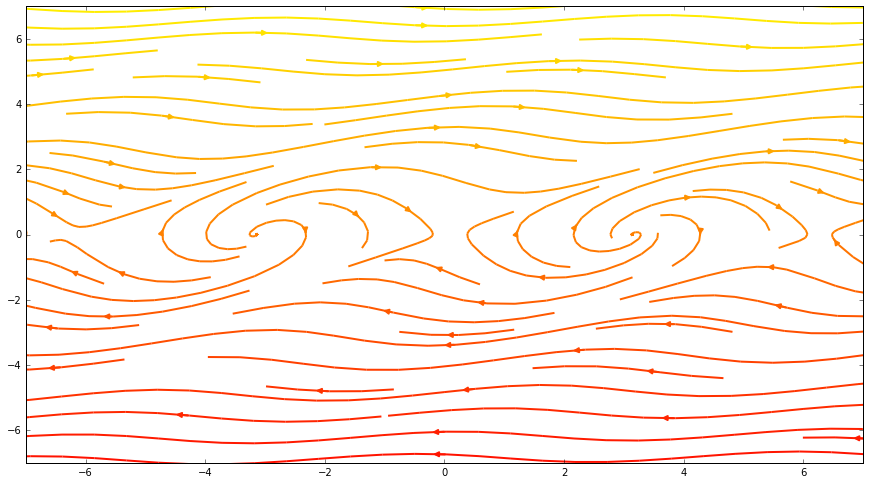

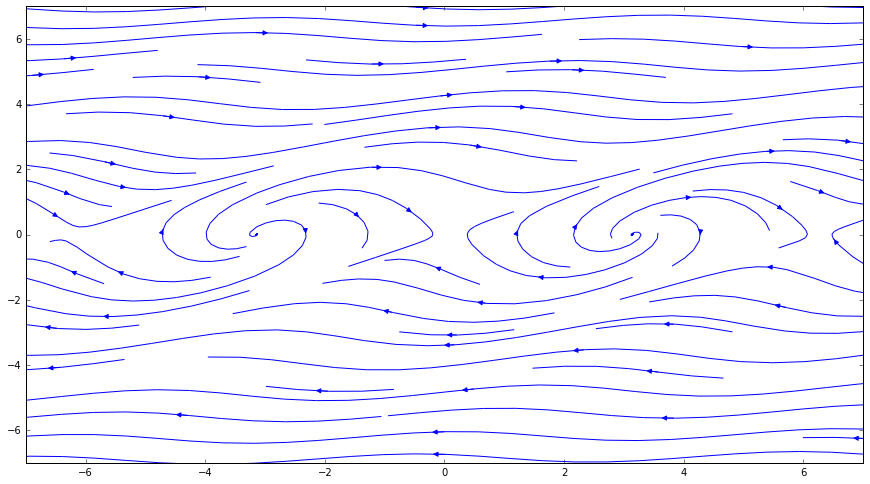

In [23]:
Y, X = np.mgrid[-8:8:100j, -8:8:100j]
U = Y
V = Omega + A*np.sin(X - Y)
speed = np.sqrt(U*U + V*V)

plt.figure(figsize=(15,18))
plt.subplot(2,1,1)
strm = plt.streamplot(X, Y, U, V, color=U, linewidth=2, cmap=plt.cm.autumn)
plt.xlim(-7,7)
plt.ylim(-7,7)
#colorbar(strm.lines)

plt.figure(figsize=(15,18))
plt.subplot(2,1,2)
plt.streamplot(X, Y, U, V, density=[1, 1])
plt.xlim(-7,7)
plt.ylim(-7,7)

plt.show()

Los gráficos de campos vectoriales permiten ver el total de soluciones dadas para el sistema y condiciones dadas. 

# Animación para una solución

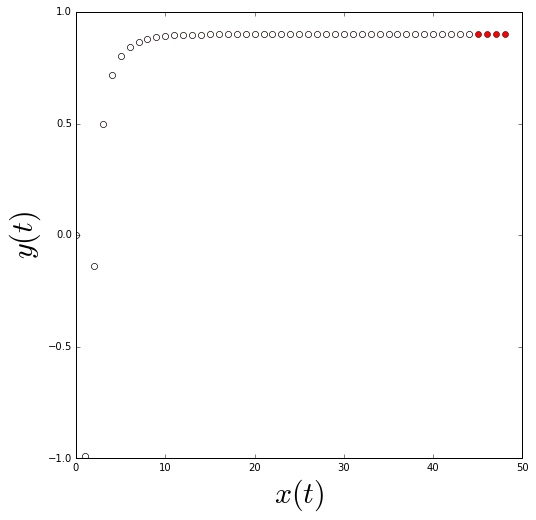

In [24]:
Omega = 0.9
omega = 0
Om = Omega - omega

fig = plt.figure(figsize = (8, 8))

y0 = np.pi
t = np.arange(0, 50, 1)
SS = odeint(lucy, y0, t, args = (Om, A))[:,0]
x=t
y=omega+A*np.sin(SS)
plt.plot(x,y,'w-');
p,=plt.plot(x,y,'bo')
p1,=plt.plot(x,y,'ro')
p2,=plt.plot(x,y,'wo')
plt.xlabel("$x(t)$",size=30)
plt.ylabel("$y(t)$",size=30)
def update(i):
    p.set_data(x[:i],y[:i])
    p1.set_data(x[:i-1],y[:i-1])
    p2.set_data(x[:i-5],y[:i-5])
ani = animation.FuncAnimation(fig, update, np.arange(len(t)))
ani.save("anims/lucy.mp4", writer="ffmpeg", fps=10, bitrate=1800)

# Animación de soluciones dos soluciones

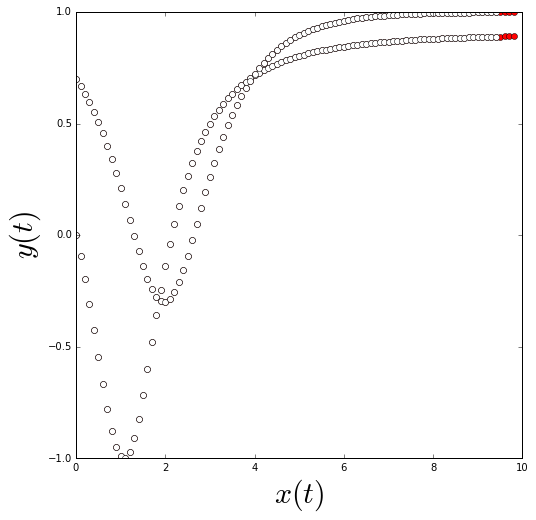

In [25]:
Omega1 = 0.9
omega1 = 0
Omega2 = 1
omega2 = 0.7
Om1 = Omega1 - omega1
Om2 = Omega2 - omega2

fig = plt.figure(figsize = (8, 8))

y0 = np.pi
t = np.arange(0, 10, 0.1)
SS1 = odeint(lucy, y0, t, args = (Om1, A))[:,0]
SS2 = odeint(lucy, y0, t, args = (Om2, A))[:,0]


x1=t
y1=omega1+A*np.sin(SS1)
x2=t
y2=omega2+A*np.sin(SS2)

plt.plot(x1,y1,'w-',x2,y2,'w-');
p,=plt.plot(x1,y1,'bo')
p_,=plt.plot(x2,y2,'bo')
p1,=plt.plot(x1,y1,'ro')
p_1,=plt.plot(x2,y2,'ro')
p2,=plt.plot(x1,y1,'wo')
p_2,=plt.plot(x2,y2,'wo')
plt.xlabel("$x(t)$",size=30)
plt.ylabel("$y(t)$",size=30)
def update(i):
    p.set_data(x1[:i],y1[:i])
    p_.set_data(x2[:i],y2[:i])
    p1.set_data(x1[:i-1],y1[:i-1])
    p_1.set_data(x2[:i-1],y2[:i-1])
    p2.set_data(x1[:i-5],y1[:i-5])
    p_2.set_data(x2[:i-5],y2[:i-5])
ani = animation.FuncAnimation(fig, update, np.arange(len(t)))
ani.save("anims/lucy2.mp4", writer="ffmpeg", fps=10, bitrate=1800)